# Importações

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import common as com
import logistic_regression as logreg
import knn
import statistical_classifiers as stat
from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

np.random.seed(12345)

train_ratio = 0.8
validation_ratio = 0.2

# Dados

Número de padrões: 214
Número de atributos: 9
Número de classes: 6


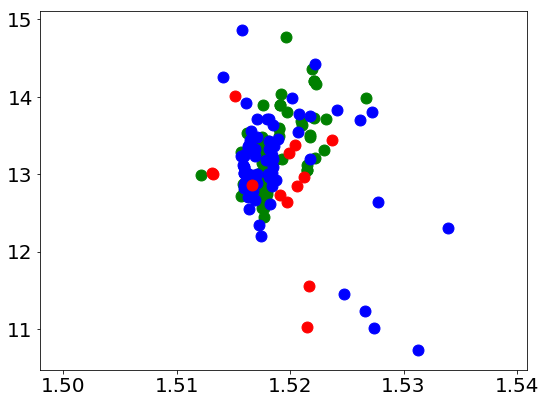

In [11]:

# data = fetch_openml(name='mfeat-karhunen')
# data = fetch_openml(name='heart-statlog')
# data = fetch_openml(name='vehicle')
#data = fetch_openml(name='sonar')
data = fetch_openml(name='glass')
#data = fetch_openml(name='ecoli')
#data = fetch_openml(name='yeast')
label_names = np.unique(data.target)
x = data.data
y = np.zeros(data.target.shape[0], dtype=int)
for k, k_label in enumerate(label_names):
   y[data.target == k_label] = k

#data_table = pd.read_csv('data/ex2data1.txt', header=None)
#data_table = pd.read_csv('data/ex2data2.txt', header=None)
#data_table = pd.read_csv('data/blobs.txt', header=None)
#data_table = pd.read_csv('data/blobs2.txt', header=None)
#data_table = pd.read_csv('data/moons.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values
#label_names = np.unique(y)

#x, y = datasets.load_iris(return_X_y=True); label_names = datasets.load_iris()['target_names']
#x, y = datasets.load_digits(return_X_y=True); label_names = datasets.load_digits()['target_names']
#x, y = datasets.load_wine(return_X_y=True); label_names = datasets.load_wine()['target_names']
#x, y = datasets.load_breast_cancer(return_X_y=True); label_names = datasets.load_breast_cancer()['target_names']
#data = datasets.fetch_olivetti_faces(); x, y = data['data'], data['target']; label_names = np.unique(data['target'])

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y).shape[0])

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

# Divisão Treino-Teste

In [5]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 190
Número de padrões de teste: 80


# Normalização dos Dados

In [6]:
normalize_data = True

if normalize_data:
    x_mean = np.mean(x_train, axis=0)        
    x_train -= x_mean
    x_std = np.std(x_train, axis=0)
    index_not_zero = x_std > 0
    x_train[:,index_not_zero] /= x_std[index_not_zero]
    
    x_test -= x_mean
    x_test[:,index_not_zero] /= x_std[index_not_zero]

# Validação

In [13]:
number_validation = int(np.ceil(0.3*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 134 amostras
Conjunto de validação: 56 amostras


In [31]:
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
index = cv.split(x)
for index_test, index_train in index:
#     print(index_test)
    aaa = x[index_test]
aaa

array([[ 1.51736, 12.78   ,  3.62   , ...,  8.7    ,  0.     ,  0.     ],
       [ 1.51727, 14.7    ,  0.     , ...,  8.95   ,  0.66   ,  0.     ],
       [ 1.52664, 11.23   ,  0.     , ..., 14.68   ,  0.     ,  0.     ],
       ...,
       [ 1.51589, 12.88   ,  3.43   , ...,  8.05   ,  0.     ,  0.24   ],
       [ 1.51838, 14.32   ,  3.26   , ...,  5.79   ,  1.63   ,  0.     ],
       [ 1.5186 , 13.36   ,  3.43   , ...,  8.6    ,  0.     ,  0.     ]])

# Modelos

In [46]:
# KNN
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
train_error = []
test_error = []

for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_train, y_train) 
    train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
    test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))

std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ KNN ] K = 3, mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ KNN ] K = 3, std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))

################################################################################################################
train_error = []
test_error = []
for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    n_estimators_list = [10] # número de modelos

    for i, n_estimators in enumerate(n_estimators_list):
        base_classifier = KNeighborsClassifier(n_neighbors=3)
        #base_classifier = DecisionTreeClassifier()
        model = BaggingClassifier(base_classifier, n_estimators=n_estimators,
                                  max_samples=1.0, n_jobs=-1, random_state=12345)

        model.fit(x_train, y_train) 

        train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
        test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))
std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ BAGGING KNN ] K = 3, mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ BAGGING KNN ] K = 3, std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))

[ KNN ] K = 3, mean train_error=17.73%, mean test_error=33.49%
[ KNN ] K = 3, std train_error=1.50%, std test_error=6.06%
[ BAGGING KNN ] K = 3, mean train_error=15.69%, mean test_error=34.05%
[ BAGGING KNN ] K = 3, std train_error=1.87%, std test_error=6.90%


In [47]:
# Árvore de Decisão
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
train_error = []
test_error = []

for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train) 
    train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
    test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))

std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ Árvore de Decisão ] mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ Árvore de Decisão ] std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))

################################################################################################################
train_error = []
test_error = []
for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    n_estimators_list = [10] # número de modelos

    for i, n_estimators in enumerate(n_estimators_list):
        #base_classifier = KNeighborsClassifier(n_neighbors=3)
        base_classifier = DecisionTreeClassifier()
        model = BaggingClassifier(base_classifier, n_estimators=n_estimators,
                                  max_samples=1.0, n_jobs=-1, random_state=12345)

        model.fit(x_train, y_train) 

        train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
        test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))
std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ BAGGING Árvore de Decisão ] mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ BAGGING Árvore de Decisão ] std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))

[ Árvore de Decisão ] mean train_error=0.00%, mean test_error=30.42%
[ Árvore de Decisão ] std train_error=0.00%, std test_error=6.64%
[ BAGGING Árvore de Decisão ] mean train_error=1.03%, mean test_error=27.07%
[ BAGGING Árvore de Decisão ] std train_error=0.65%, std test_error=6.99%


In [ ]:
# MLP
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
train_error = []
test_error = []

for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train) 
    train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
    test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))

std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ Árvore de Decisão ] mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ Árvore de Decisão ] std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))

################################################################################################################
train_error = []
test_error = []
for train_index, test_index in cv.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    n_estimators_list = [10] # número de modelos

    for i, n_estimators in enumerate(n_estimators_list):
        #base_classifier = KNeighborsClassifier(n_neighbors=3)
        base_classifier = DecisionTreeClassifier()
        model = BaggingClassifier(base_classifier, n_estimators=n_estimators,
                                  max_samples=1.0, n_jobs=-1, random_state=12345)

        model.fit(x_train, y_train) 

        train_error.append(np.round(100*np.mean(y_train != model.predict(x_train)), 2))
        test_error.append(np.round(100*np.mean(y_test != model.predict(x_test)), 2))
std_train = np.std(np.array(train_error))
std_test = np.std(np.array(test_error))
mean_train = np.mean(np.array(train_error))
mean_test = np.mean(np.array(test_error))
print("[ BAGGING Árvore de Decisão ] mean train_error=%.2f%%, mean test_error=%.2f%%" % (mean_train, mean_test))
print("[ BAGGING Árvore de Decisão ] std train_error=%.2f%%, std test_error=%.2f%%" % (std_train, std_test))